Generate a balanced dataset of 54000 data points with 18000 of label 0, 1, 2 each

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Force uninstall existing versions
!pip uninstall -y numpy scipy scikit-learn
# Install a known compatible numpy version first
!pip install numpy==1.25.0
# Then install scikit-learn, which will pull compatible scipy
!pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("merged_data.csv")
df.head()

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 23.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13,-61,5,6.769995,99.43,31.17,15,03:00.0,2
1,-20,-69,-3,6.769995,99.43,31.17,15,03:00.0,2
2,-31,-78,-15,6.769995,99.43,31.17,15,03:00.1,2
3,-47,-65,-38,6.769995,99.43,31.17,15,03:00.1,2
4,-67,-57,-53,6.769995,99.43,31.17,15,03:00.1,2


Loading the necessary models and reading the file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("balanced_data.csv")
df.head()


,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-21.0,-53.0,27.0,0.213944,75.07,30.37,5C,2020-05-08 22:11:34.750000128,1.0
1,-49.0,-20.0,-37.0,0.237003,75.78,30.71,5C,2020-05-08 22:19:50.437499904,1.0
2,-78.0,15.0,-17.0,0.169362,88.87,29.79,5C,2020-06-24 14:22:37.718749952,2.0
3,-58.0,20.0,-3.0,0.381768,89.58,30.81,5C,2020-05-08 22:25:12.093750016,1.0
4,-57.0,-13.0,127.0,6.010464,109.75,35.81,5C,2020-04-14 22:55:47.406249984,1.0


Dropping the id column

In [ ]:
#Importing numpy library
import pandas as pd

# Drop the id column
df = pd.read_csv("balanced_data.csv")
df.head()
if "id" in df.columns:
    df = df.drop("id", axis=1)

df.columns = df.columns.str.strip()


if "datetime" in df.columns:
    df = df.drop("datetime", axis=1)

non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", list(non_numeric_cols))

for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

df.info()


Non-numeric columns: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       54000 non-null  float64
 1   Y       54000 non-null  float64
 2   Z       54000 non-null  float64
 3   EDA     54000 non-null  float64
 4   HR      54000 non-null  float64
 5   TEMP    54000 non-null  float64
 6   label   54000 non-null  float64
dtypes: float64(7)
memory usage: 2.9 MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.inspection import permutation_importance
import warnings

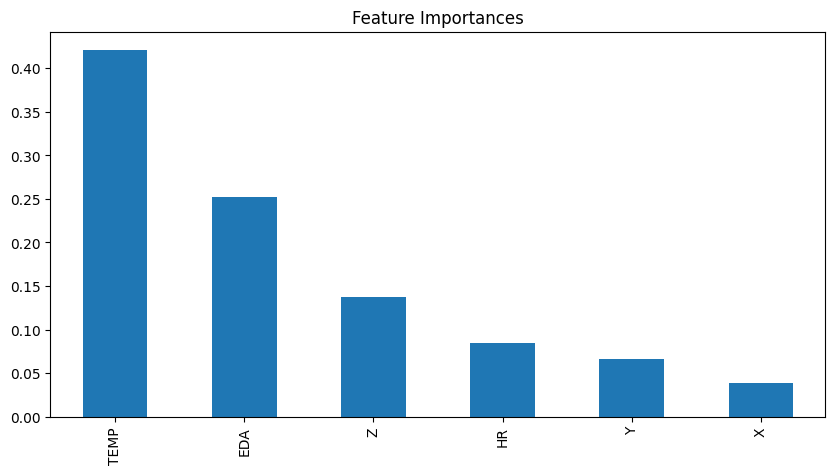

TEMP    0.421028
EDA     0.251712
Z       0.136872
HR      0.084961
Y       0.066478
dtype: float64


In [ ]:
X = df.drop("label", axis=1)
y = df["label"]

rf_temp = RandomForestClassifier(n_estimators=200, random_state=42)
rf_temp.fit(X, y)

importances = pd.Series(rf_temp.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importances")
plt.show()

print(importances.sort_values(ascending=False).head(5))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X_train_scaled)

[[-1.01686255  0.13649012 -0.36130144 -0.4931808  -1.12700563 -0.95008558]
 [ 0.82884169  0.5418613   0.62602158 -0.5254671  -0.56924201 -0.29141729]
 [ 0.68118535 -0.76779943  0.48825558 -0.49994859 -0.54591072 -0.15080271]
 ...
 [-1.05377664  0.69777329 -1.18789747 -0.48391482 -0.40738119 -0.09899734]
 [-0.1678386  -0.11296906  0.28160657 -0.49453566 -0.95056276 -0.75026486]
 [-0.38932311 -0.58070504  1.98072062  1.22266281  0.36692595  1.52917146]]


In [ ]:
print(X_test_scaled)

[[ 0.01673182  0.4483141   0.30456757 -0.48685846 -0.05157904 -0.67625719]
 [-1.12760481 -0.11296906 -0.54498945 -0.49792264 -0.43289979 -0.75766563]
 [-0.13092452 -0.05060427  0.30456757  0.01386989 -0.19448318  1.14433156]
 ...
 [ 0.60735718 -1.95273056 -0.52202845 -0.49769366  1.20612323 -0.08419581]
 [ 0.12747408  1.66442763 -0.47610645  0.0978902   1.2221635   1.1147285 ]
 [ 0.68118535  0.16767252  0.55713858 -0.49340661 -0.07053571 -0.7872687 ]]


Logistic regression

In [ ]:
lr = LogisticRegression(max_iter=250)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("Logistic Regression")
print("----------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression
----------------------
Accuracy: 0.7068518518518518

Confusion Matrix:
[[3425    1  174]
 [ 920 1736  944]
 [ 737  390 2473]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.95      0.79      3600
         1.0       0.82      0.48      0.61      3600
         2.0       0.69      0.69      0.69      3600

    accuracy                           0.71     10800
   macro avg       0.73      0.71      0.69     10800
weighted avg       0.73      0.71      0.69     10800



Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest")
print("----------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest
----------------------
Accuracy: 0.9962962962962963

Confusion Matrix:
[[3582    5   13]
 [  11 3588    1]
 [   5    5 3590]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3600
         1.0       1.00      1.00      1.00      3600
         2.0       1.00      1.00      1.00      3600

    accuracy                           1.00     10800
   macro avg       1.00      1.00      1.00     10800
weighted avg       1.00      1.00      1.00     10800



In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest")
print("----------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest
----------------------
Accuracy: 0.9963888888888889

Confusion Matrix:
[[3585    4   11]
 [  13 3586    1]
 [   5    5 3590]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3600
         1.0       1.00      1.00      1.00      3600
         2.0       1.00      1.00      1.00      3600

    accuracy                           1.00     10800
   macro avg       1.00      1.00      1.00     10800
weighted avg       1.00      1.00      1.00     10800



XgBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss"
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("XGBoost")
print("----------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

XGBoost
----------------------
Accuracy: 0.9986111111111111

Confusion Matrix:
[[3593    2    5]
 [   1 3597    2]
 [   4    1 3595]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3600
         1.0       1.00      1.00      1.00      3600
         2.0       1.00      1.00      1.00      3600

    accuracy                           1.00     10800
   macro avg       1.00      1.00      1.00     10800
weighted avg       1.00      1.00      1.00     10800



In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("MLP Neural Network")
print("----------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


MLP Neural Network
----------------------
Accuracy: 0.986574074074074

Confusion Matrix:
[[3518   50   32]
 [  27 3568    5]
 [  21   10 3569]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      3600
         1.0       0.98      0.99      0.99      3600
         2.0       0.99      0.99      0.99      3600

    accuracy                           0.99     10800
   macro avg       0.99      0.99      0.99     10800
weighted avg       0.99      0.99      0.99     10800



Analysis Phase

This cell loads the dataset, removes useless ID and constant columns, checks the target, and saves a clean file for modeling.

In [1]:
import pandas as pd
import numpy as np
import re
from pathlib import Path

PREFERRED_PATHS = ["balanced_data.csv"]
TARGET = "label"
OUT_PATH = "_working_df.csv"

csv_path = None
for p in PREFERRED_PATHS:
    if Path(p).exists():
        csv_path = p
        break
if csv_path is None:
    raise FileNotFoundError(f"None of the expected CSV files were found. Looked for: {PREFERRED_PATHS}")

print("Loading CSV:", csv_path)

df = pd.read_csv(csv_path)
print("Raw rows:", len(df), "columns:", len(df.columns))

def is_id_like(col_name: str) -> bool:
    name = col_name.strip().lower()
    return (
        name == "id" or
        name.endswith("_id") or
        name.startswith("id_") or
        re.fullmatch(r".*[\W_]?id$", name) is not None
    )

id_like_cols = [c for c in df.columns if is_id_like(c)]
if id_like_cols:
    print("Dropping ID-like columns:", id_like_cols)
    df = df.drop(columns=id_like_cols)
else:
    print("No ID-like columns found.")

if TARGET not in df.columns:
    raise ValueError(f"Target column '{TARGET}' not found in {csv_path}. Available columns: {list(df.columns)[:30]}")

const_cols = df.columns[df.nunique(dropna=False) <= 1].tolist()
if const_cols:
    print("Dropping fully-constant columns:", const_cols)
    df = df.drop(columns=const_cols)

print("Final rows:", len(df), "columns:", len(df.columns))
print("Label distribution:\n", df[TARGET].value_counts(dropna=False))

df.to_csv(OUT_PATH, index=False)
print(f"Saved cleaned dataset to '{OUT_PATH}'")


Loading CSV: balanced_data.csv
Raw rows: 54000 columns: 9
Dropping ID-like columns: ['id']
Final rows: 54000 columns: 8
Label distribution:
 label
1.0    18000
2.0    18000
0.0    18000
Name: count, dtype: int64
Saved cleaned dataset to '_working_df.csv'


Preprocesses features (datetime handling, selective one-hot/ordinal encoding, scaling) and trains a Random Forest to produce aggregated feature importances.

In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

TARGET = "label"
df = pd.read_csv("_working_df.csv")

def add_datetime_parts(frame: pd.DataFrame):
    frame = frame.copy()
    dt_cols = []
    for c in frame.columns:
        if c == TARGET:
            continue
        if np.issubdtype(frame[c].dtype, np.datetime64):
            dt_cols.append(c)
        elif frame[c].dtype == object:
            try:
                parsed = pd.to_datetime(frame[c], errors="raise", utc=False)
                dt_cols.append(c)
                frame[c] = parsed
            except Exception:
                pass
    for c in dt_cols:
        frame[c + "_year"] = frame[c].dt.year
        frame[c + "_month"] = frame[c].dt.month
        frame[c + "_day"] = frame[c].dt.day
        frame[c + "_hour"] = frame[c].dt.hour
        frame[c + "_dow"] = frame[c].dt.dayofweek
        frame = frame.drop(columns=[c])
    return frame, dt_cols

df2, parsed_dt_cols = add_datetime_parts(df)

X = df2.drop(columns=[TARGET])
y = df2[TARGET]

obj_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

low_card_cols = [c for c in obj_cols if X[c].nunique(dropna=False) <= 50]
high_card_cols = [c for c in obj_cols if X[c].nunique(dropna=False) > 50]

num_cols = X.columns.difference(obj_cols).tolist()

transformers = []
if num_cols:
    transformers.append(("num", StandardScaler(), num_cols))
if low_card_cols:
    transformers.append(("lowcat", OneHotEncoder(handle_unknown="ignore", sparse=False), low_card_cols))
if high_card_cols:
    transformers.append(("highcat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), high_card_cols))

preprocess = ColumnTransformer(transformers=transformers, remainder="drop")

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

pipe = Pipeline([("prep", preprocess), ("rf", rf)])
pipe.fit(X, y)

rf_model = pipe.named_steps["rf"]
importances = rf_model.feature_importances_

feature_names = []
if num_cols:
    feature_names.extend(num_cols)
if low_card_cols:
    ohe = pipe.named_steps["prep"].named_transformers_["lowcat"]
    feature_names.extend(ohe.get_feature_names_out(low_card_cols).tolist())
if high_card_cols:
    feature_names.extend(high_card_cols)

agg = defaultdict(float)
for imp, fname in zip(importances, feature_names):
    base = fname.split("_", 1)[0] if any(fname.startswith(c + "_") for c in low_card_cols) else fname
    for col in low_card_cols:
        if fname.startswith(col + "_") or fname.startswith(col + "="):
            base = col
            break
    agg[base] += imp

feat_df = pd.DataFrame(sorted(agg.items(), key=lambda x: x[1], reverse=True), columns=["feature", "importance"])

print("Datetime columns parsed:", parsed_dt_cols if parsed_dt_cols else "None")
print("\nTop contributing feature:", feat_df.iloc[0]["feature"])
print("\nTop 10 features by aggregated importance:")
display(feat_df.head(10))

Datetime columns parsed: ['datetime']

Top contributing feature: datetime_hour

Top 10 features by aggregated importance:


,feature,importance
0,datetime_hour,0.290164
1,datetime_dow,0.175128
2,TEMP,0.169633
3,datetime_month,0.166469
4,datetime_day,0.071665
5,EDA,0.061246
6,Z,0.026912
7,HR,0.016821
8,Y,0.014421
9,X,0.007541


This cell prepares the train/test split and provides a reusable evaluation function with consistent preprocessing.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

TARGET = "label"

df = pd.read_csv("_working_df.csv")

def add_datetime_parts(frame: pd.DataFrame):
    frame = frame.copy()
    dt_cols = []
    for c in frame.columns:
        if c == TARGET:
            continue
        if np.issubdtype(frame[c].dtype, np.datetime64):
            dt_cols.append(c)
        elif frame[c].dtype == object:
            try:
                parsed = pd.to_datetime(frame[c], errors="raise", utc=False)
                dt_cols.append(c)
                frame[c] = parsed
            except Exception:
                pass
    for c in dt_cols:
        frame[c + "_year"] = frame[c].dt.year
        frame[c + "_month"] = frame[c].dt.month
        frame[c + "_day"] = frame[c].dt.day
        frame[c + "_hour"] = frame[c].dt.hour
        frame[c + "_dow"] = frame[c].dt.dayofweek
        frame = frame.drop(columns=[c])
    return frame

df2 = add_datetime_parts(df)

X = df2.drop(columns=[TARGET])
y = df2[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.to_csv("_X_train.csv", index=False)
X_test.to_csv("_X_test.csv", index=False)
y_train.to_csv("_y_train.csv", index=False)
y_test.to_csv("_y_test.csv", index=False)

def build_preprocessor(X_frame: pd.DataFrame):
    obj_cols = X_frame.select_dtypes(include=["object", "category"]).columns.tolist()
    low_card_cols = [c for c in obj_cols if X_frame[c].nunique(dropna=False) <= 50]
    high_card_cols = [c for c in obj_cols if X_frame[c].nunique(dropna=False) > 50]
    num_cols = X_frame.columns.difference(obj_cols).tolist()
    transformers = []
    if num_cols:
        transformers.append(("num", StandardScaler(), num_cols))
    if low_card_cols:
        transformers.append(("lowcat", OneHotEncoder(handle_unknown="ignore", sparse=False), low_card_cols))
    if high_card_cols:
        transformers.append(("highcat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), high_card_cols))
    return ColumnTransformer(transformers=transformers, remainder="drop")

def fit_eval(model, X_tr, y_tr, X_te, y_te, name="Model"):
    preprocessor = build_preprocessor(X_tr)
    pipe = Pipeline([("prep", preprocessor), ("model", model)])
    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_te)
    acc = accuracy_score(y_te, preds)
    cm = confusion_matrix(y_te, preds, labels=np.sort(y_te.unique()))
    print(f"{name} — accuracy: {acc:.4f}")
    print("Confusion matrix (rows=true, cols=pred):")
    print(cm)
    print("\nClassification report:")
    print(classification_report(y_te, preds, digits=4))
    return pipe

print("Data prepared. Use subsequent cells to train different algorithms with consistent preprocessing.")

Data prepared. Use subsequent cells to train different algorithms with consistent preprocessing.


In [4]:
import joblib

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)

pipe_logreg = fit_eval(
    logreg,
    X_train, y_train,
    X_test, y_test,
    name="LogisticRegression"
)

joblib.dump(pipe_logreg, "job/logistic_regression.joblib")


LogisticRegression — accuracy: 0.9944
Confusion matrix (rows=true, cols=pred):
[[3589    1   10]
 [  43 3557    0]
 [   7    0 3593]]

Classification report:
              precision    recall  f1-score   support

         0.0     0.9863    0.9969    0.9916      3600
         1.0     0.9997    0.9881    0.9939      3600
         2.0     0.9972    0.9981    0.9976      3600

    accuracy                         0.9944     10800
   macro avg     0.9944    0.9944    0.9944     10800
weighted avg     0.9944    0.9944    0.9944     10800



['job/logistic_regression.joblib']

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

pipe_rf = fit_eval(
    rf,
    X_train, y_train,
    X_test, y_test,
    name="RandomForest"
)


joblib.dump(pipe_rf, "job/random_forest.joblib")


RandomForest — accuracy: 0.9999
Confusion matrix (rows=true, cols=pred):
[[3599    1    0]
 [   0 3600    0]
 [   0    0 3600]]

Classification report:
              precision    recall  f1-score   support

         0.0     1.0000    0.9997    0.9999      3600
         1.0     0.9997    1.0000    0.9999      3600
         2.0     1.0000    1.0000    1.0000      3600

    accuracy                         0.9999     10800
   macro avg     0.9999    0.9999    0.9999     10800
weighted avg     0.9999    0.9999    0.9999     10800



['job/random_forest.joblib']

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

gb = GradientBoostingClassifier(
    n_estimators=2000,      # increase iterations
    learning_rate=0.05,
    random_state=42
)

pipe_gb = fit_eval(
    gb,
    X_train, y_train,
    X_test, y_test,
    name="GradientBoosting"
)

joblib.dump(pipe_gb, "job/gradient_boosting.joblib")

KeyboardInterrupt: 

In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=2000,
    random_state=42
)

pipe_mlp = fit_eval(
    mlp,
    X_train, y_train,
    X_test, y_test,
    name="MLPClassifier"
)


joblib.dump(pipe_mlp, "job/mlp_classifier.joblib")


MLPClassifier — accuracy: 0.9995
Confusion matrix (rows=true, cols=pred):
[[3599    1    0]
 [   4 3596    0]
 [   0    0 3600]]

Classification report:
              precision    recall  f1-score   support

         0.0     0.9989    0.9997    0.9993      3600
         1.0     0.9997    0.9989    0.9993      3600
         2.0     1.0000    1.0000    1.0000      3600

    accuracy                         0.9995     10800
   macro avg     0.9995    0.9995    0.9995     10800
weighted avg     0.9995    0.9995    0.9995     10800



['job/mlp_classifier.joblib']

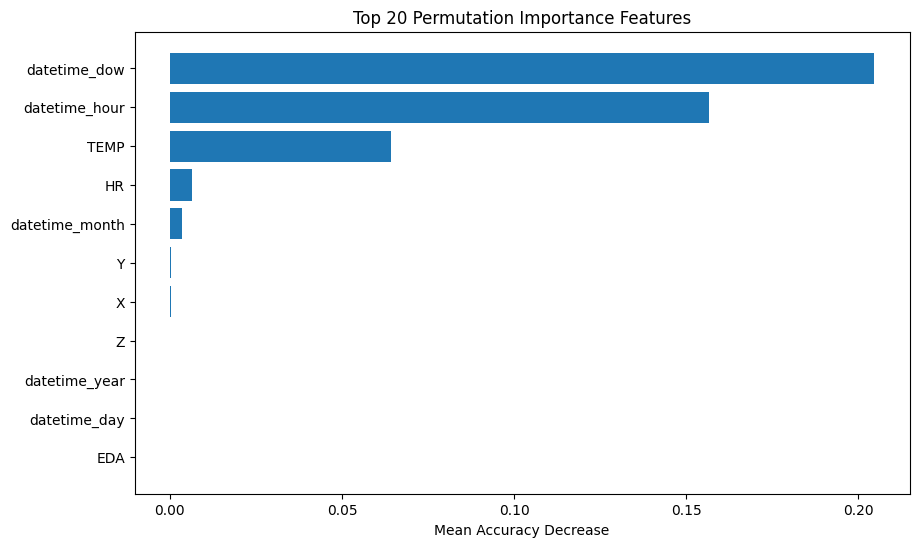

,feature,importance_mean,importance_std
10,datetime_dow,0.204685,0.003071
9,datetime_hour,0.156565,0.001857
5,TEMP,0.064148,0.001512
4,HR,0.006361,0.000465
7,datetime_month,0.003389,0.000242
1,Y,0.000454,0.000173
0,X,0.000417,0.000139
2,Z,0.000019,0.000091
6,datetime_year,0.000000,0.000000
8,datetime_day,0.000000,0.000000


In [11]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

model = pipe_rf

result = permutation_importance(
    model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(perm_df['feature'][:20], perm_df['importance_mean'][:20])
plt.gca().invert_yaxis()
plt.title("Top 20 Permutation Importance Features")
plt.xlabel("Mean Accuracy Decrease")
plt.show()

perm_df.head(20)


In [12]:
import shap

explainer = shap.TreeExplainer(pipe_rf.named_steps['model'])
X_test_trans = pipe_rf.named_steps['prep'].transform(X_test)
shap_values = explainer.shap_values(X_test_trans)
shap.summary_plot(shap_values, X_test_trans, feature_names=pipe_rf.named_steps['prep'].get_feature_names_out())

KeyboardInterrupt: 

In [13]:
import numpy as np

def compute_ece_multiclass(probs, y_true, n_bins=15):
    confidences = probs.max(axis=1)
    predictions = probs.argmax(axis=1)
    bins = np.linspace(0, 1, n_bins + 1)
    ece = 0.0

    for i in range(n_bins):
        in_bin = (confidences >= bins[i]) & (confidences < bins[i+1])
        bin_count = in_bin.sum()
        if bin_count == 0:
            continue
        bin_accuracy = (predictions[in_bin] == y_true[in_bin]).mean()
        bin_confidence = confidences[in_bin].mean()
        ece += (bin_count / len(probs)) * abs(bin_accuracy - bin_confidence)

    return ece

In [14]:
probs = pipe_rf.predict_proba(X_test)
true = y_test.values

print("ECE:", compute_ece_multiclass(probs, true))

ECE: 0.000977777777777765


In [15]:
import numpy as np

def create_sequences(X, y, window=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - window):
        X_seq.append(X.iloc[i:i+window].values)
        y_seq.append(y.iloc[i+window])
    return np.array(X_seq), np.array(y_seq)

WINDOW = 10
X_seq, y_seq = create_sequences(df2.drop(columns=['label']), df2['label'], window=WINDOW)

# Train/test split
split = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]


In [ ]:
!mkdir -p models

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os, re


def is_id_like(col):
    col = col.strip().lower()
    return (
        col == "id"
        or col.endswith("_id")
        or col.startswith("id_")
        or bool(re.fullmatch(r".*[\W_]?id$", col))
    )


def add_datetime_parts(df, target):
    df = df.copy()
    dt_cols = []

    for c in df.columns:
        if c == target:
            continue

        if df[c].dtype == object:
            try:
                parsed = pd.to_datetime(df[c], errors="raise")
                df[c] = parsed
                dt_cols.append(c)
            except:
                pass

        elif np.issubdtype(df[c].dtype, np.datetime64):
            dt_cols.append(c)


    for c in dt_cols:
        df[c + "_year"]  = df[c].dt.year
        df[c + "_month"] = df[c].dt.month
        df[c + "_day"]   = df[c].dt.day
        df[c + "_hour"]  = df[c].dt.hour
        df[c + "_dow"]   = df[c].dt.dayofweek
        df.drop(columns=[c], inplace=True)

    return df


def safe_numericize(df, target):
    df = df.copy()
    for c in df.columns:
        if c == target:
            continue

        if df[c].dtype == object:
            try:
                numeric = pd.to_numeric(df[c], errors="coerce")

                if numeric.notna().sum() > 0.90 * len(df):
                    df[c] = numeric.fillna(numeric.median())
                else:
                    codes, _ = pd.factorize(df[c])
                    df[c] = codes.astype(np.float32)
            except:
                codes, _ = pd.factorize(df[c])
                df[c] = codes.astype(np.float32)

    return df




def build_model(n_features, n_classes):
    reg = keras.regularizers.l2(1e-4)

    inputs = keras.Input(shape=(n_features,), name="features")


    norm = layers.Normalization()
    x = norm(inputs)


    x = layers.Dense(256, kernel_regularizer=reg)(x)
    x = layers.Activation(tf.keras.activations.gelu)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)


    shortcut = layers.Dense(128, kernel_regularizer=reg)(x)

    r = layers.Dense(128, kernel_regularizer=reg)(x)
    r = layers.Activation(tf.keras.activations.gelu)(r)
    r = layers.BatchNormalization()(r)
    r = layers.Dropout(0.2)(r)
    r = layers.Dense(128, kernel_regularizer=reg)(r)
    r = layers.BatchNormalization()(r)

    x = layers.Add()([shortcut, r])
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.2)(x)


    shortcut2 = layers.Dense(64, kernel_regularizer=reg)(x)

    r2 = layers.Dense(64, kernel_regularizer=reg)(x)
    r2 = layers.Activation(tf.keras.activations.gelu)(r2)
    r2 = layers.BatchNormalization()(r2)
    r2 = layers.Dropout(0.2)(r2)
    r2 = layers.Dense(64, kernel_regularizer=reg)(r2)
    r2 = layers.BatchNormalization()(r2)

    x = layers.Add()([shortcut2, r2])
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.2)(x)


    x = layers.Dense(64, activation=tf.keras.activations.gelu)(x)
    x = layers.Dropout(0.2)(x)

    outputs = layers.Dense(n_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model




df = pd.read_csv("balanced_data.csv")
target = "label"


df = df.drop(columns=[c for c in df.columns if is_id_like(c)], errors="ignore")


df = add_datetime_parts(df, target)


df = df.loc[:, df.nunique() > 1]


df = safe_numericize(df, target)


y = df[target].values
df = df.drop(columns=[target])
X = df.values.astype(np.float32)

classes = np.unique(y)
n_classes = len(classes)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


model = build_model(X_train.shape[1], n_classes)


model.layers[1].adapt(X_train)

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        verbose=1,
        min_lr=1e-5
    ),
    keras.callbacks.ModelCheckpoint(
        "models/tf_best.keras",
        save_best_only=True,
        monitor="val_accuracy"
    )
]


history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=512,
    callbacks=callbacks,
    verbose=1
)

preds = model.predict(X_test).argmax(axis=1)
acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)

print("\n FINAL ACCURACY:", acc)
print("\n CONFUSION MATRIX:\n", cm)
print("\n CLASSIFICATION REPORT:\n", classification_report(y_test, preds))

print("\n Model saved to models/tf_best.keras")


In [ ]:
!pip install xgboost lightgbm catboost

import pandas as pd
import numpy as np
import os, re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

def is_id_like(col):
    col = col.lower()
    return (
        col == "id" or col.endswith("_id") or col.startswith("id_")
        or bool(re.fullmatch(r".*[_-]?id$", col))
    )

def clean_dataset(df, target):
    df = df.drop(columns=[c for c in df.columns if is_id_like(c)], errors="ignore")
    df = df.loc[:, df.nunique() > 1]

    dt_cols = []
    for c in df.columns:
        if c == target:
            continue
        if df[c].dtype == object:
            try:
                parsed = pd.to_datetime(df[c], errors="raise")
                df[c] = parsed
                dt_cols.append(c)
            except:
                pass
        elif np.issubdtype(df[c].dtype, np.datetime64):
            dt_cols.append(c)

    for c in dt_cols:
        df[c+"_year"] = df[c].dt.year
        df[c+"_month"] = df[c].dt.month
        df[c+"_day"] = df[c].dt.day
        df[c+"_hour"] = df[c].dt.hour
        df[c+"_dow"] = df[c].dt.dayofweek
        df.drop(columns=[c], inplace=True)

    for c in df.columns:
        if df[c].dtype == object:
            df[c] = df[c].astype("category").cat.codes

    return df

df = pd.read_csv("balanced_data.csv")
target = "label"

df = clean_dataset(df, target)

y = df[target].values
X = df.drop(columns=[target])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

os.makedirs("models", exist_ok=True)

models = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "LinearSVC": LinearSVC(max_iter=2000),
    "SVM_RBF": SVC(kernel="rbf", probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "RandomForest": RandomForestClassifier(n_estimators=2000),
    "XGBoost": xgb.XGBClassifier(
        n_estimators=2000,
        tree_method="hist",
        eval_metric="mlogloss"
    ),
    "LightGBM": lgb.LGBMClassifier(n_estimators=2000),
    "CatBoost": CatBoostClassifier(iterations=2000, verbose=0),
}


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "models/scaler.joblib")

for name, model in models.items():
    print(f"\n==============================")
    print(f"Training {name}")
    print(f"==============================")

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)

    print(f"Accuracy ({name}): {acc}")
    print(f"Confusion Matrix ({name}):\n", confusion_matrix(y_test, preds))
    print(f"Classification Report ({name}):\n", classification_report(y_test, preds))

    joblib.dump(model, f"models/{name}.joblib")

print("\n All models trained and saved in 'models/' folder!")

In [18]:
# se_widedeep_with_checkpoints.py
# Modified training script to log validation accuracy at specific epoch checkpoints
# and to stop when validation accuracy does not improve for 20 epochs.

!pip -q install -U tensorflow scikit-learn pandas numpy

import os, re, json, math, itertools, random
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt

# ------------------- USER / GLOBAL SETTINGS -------------------
CSV_PATH = "balanced_data.csv"           # set to "your_file.csv" if you want no upload prompt
TARGET = "label"
VAL_SIZE = 0.2
SEED = 42

HIDDEN_SIZES = [512, 256, 128]
DROPOUT_RATE = 0.10
LABEL_SMOOTH = 0.02
MAX_CROSS_PAIRS = 20

SAVE_DIR = "job"
SAVE_PATH = os.path.join(SAVE_DIR, "our_se_widedeep.keras")

# The epoch checkpoints you asked for:
EPOCH_CHECKPOINTS = [100]
MAX_EPOCH = max(EPOCH_CHECKPOINTS)

# Early stopping patience (if val accuracy doesn't improve for this many epochs, stop)
EARLYSTOP_PATIENCE = 20
# ---------------------------------------------------------------

os.makedirs(SAVE_DIR, exist_ok=True)

def is_id_like(name: str) -> bool:
    n = name.strip().lower()
    return (
        n == "id"
        or n.endswith("_id")
        or n.startswith("id_")
        or re.fullmatch(r".*[\W_]?id$", n) is not None
    )

def add_datetime_parts(df: pd.DataFrame, target: str):
    df = df.copy()
    dt_cols = []
    for c in df.columns:
        if c == target:
            continue
        if np.issubdtype(df[c].dtype, np.datetime64):
            dt_cols.append(c)
        elif df[c].dtype == object:
            try:
                parsed = pd.to_datetime(df[c], errors="raise", utc=False)
                dt_cols.append(c)
                df[c] = parsed
            except:
                pass
    for c in dt_cols:
        df[c+"_year"] = df[c].dt.year
        df[c+"_month"] = df[c].dt.month
        df[c+"_day"] = df[c].dt.day
        df[c+"_hour"] = df[c].dt.hour
        df[c+"_dow"] = df[c].dt.dayofweek
        df.drop(columns=[c], inplace=True)
    return df

def auto_feature_crosses(X_df: pd.DataFrame, max_pairs=20):
    num_cols = X_df.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols) < 2:
        return X_df, []
    variances = X_df[num_cols].var().sort_values(ascending=False)
    k = min(max_pairs + 2, len(num_cols))
    top_cols = variances.index.tolist()[:k]
    pairs = list(itertools.combinations(top_cols, 2))[:max_pairs]
    for a, b in pairs:
        X_df[f"{a}*{b}"] = X_df[a].values * X_df[b].values
    return X_df, pairs

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seed(SEED)

# Load CSV (Colab upload fallback if CSV_PATH is None)
if CSV_PATH is None:
    try:
        from google.colab import files
        up = files.upload()
        CSV_PATH = list(up.keys())[0]
    except Exception:
        raise ValueError("CSV_PATH is None and google.colab.files not available. Set CSV_PATH to your file.")

print("Loading:", CSV_PATH)
df = pd.read_csv(CSV_PATH)

# Drop id-like columns
id_like = [c for c in df.columns if is_id_like(c)]
if id_like:
    df.drop(columns=id_like, inplace=True)
    print("Dropped id-like columns:", id_like)

if TARGET not in df.columns:
    raise ValueError(f"Target '{TARGET}' not found.")

# Drop constant columns
nunique = df.nunique(dropna=False)
const_cols = nunique[nunique <= 1].index.tolist()
if const_cols:
    df.drop(columns=const_cols, inplace=True)
    print("Dropped constant columns:", const_cols)

# Expand datetime features if any
df = add_datetime_parts(df, TARGET)

# Prepare labels
y_raw = df[TARGET].values
classes = np.unique(y_raw)
class_map = {c: i for i, c in enumerate(classes)}
y = np.array([class_map[v] for v in y_raw], dtype=int)

# Prepare features
X = df.drop(columns=[TARGET]).copy()
for c in X.columns:
    if X[c].dtype == object:
        vals, inv = np.unique(X[c].astype(str).values, return_inverse=True)
        X[c] = inv.astype(np.float32)

X, used_pairs = auto_feature_crosses(X, max_pairs=MAX_CROSS_PAIRS)

# Train / Val split
X_train_df, X_val_df, y_train, y_val = train_test_split(
    X, y, test_size=VAL_SIZE, random_state=SEED, stratify=y
)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df.values.astype(np.float32))
X_val = scaler.transform(X_val_df.values.astype(np.float32))

input_dim = X_train.shape[1]
num_classes = len(classes)

# -- model builder (your SE + Wide & Deep) ----------------------------------
def se_block(x, ratio=8, name="se"):
    channels = x.shape[-1]
    # We need a 2D sequence-like input for GlobalAveragePooling1D so expand dims, like your original
    s = layers.GlobalAveragePooling1D(name=f"{name}_gap")(keras.ops.expand_dims(x, axis=1))
    s = layers.Dense(max(1, channels // ratio), activation="relu", name=f"{name}_fc1")(s)
    s = layers.Dense(channels, activation="sigmoid", name=f"{name}_fc2")(s)
    s = layers.Reshape((channels,), name=f"{name}_reshape")(s)
    return layers.Multiply(name=f"{name}_scale")([x, s])

inputs = keras.Input(shape=(input_dim,), name="features")

# Wide part
wide_logits = layers.Dense(num_classes, use_bias=True, name="wide_linear")(inputs)

# Deep part with SE blocks
x = inputs
for i, h in enumerate(HIDDEN_SIZES, 1):
    x = layers.Dense(h, kernel_initializer="he_normal", name=f"dense_{i}")(x)
    x = layers.Activation("gelu", name=f"gelu_{i}")(x)
    x = layers.Dropout(DROPOUT_RATE, name=f"drop_{i}")(x)
    x = se_block(x, ratio=8, name=f"se_{i}")

deep_logits = layers.Dense(num_classes, name="deep_logits")(x)
combined_logits = layers.Add(name="wide_plus_deep")([wide_logits, deep_logits])
outputs = layers.Activation("softmax", name="softmax")(combined_logits)

model = keras.Model(inputs, outputs, name="SE_WideDeep")

# Learning rate schedule (kept from your original script)
steps_per_epoch = max(1, math.ceil(len(X_train) / 512))
total_steps = steps_per_epoch * 40
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=3e-3, decay_steps=total_steps, alpha=2e-4
)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=opt,
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=LABEL_SMOOTH),
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")]
)

y_train_oh = keras.utils.to_categorical(y_train, num_classes)
y_val_oh = keras.utils.to_categorical(y_val, num_classes)

# ------------------ Custom callback to log checkpoint accuracies -------------
class CheckpointLogger(callbacks.Callback):
    def __init__(self, X_val, y_val, checkpoints, out_dir):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.checkpoints = set(checkpoints)
        self.out_dir = out_dir
        self.logged = {}  # epoch -> accuracy
        self.val_acc_history = []  # store val_acc per epoch (if available from logs)

    def on_epoch_end(self, epoch, logs=None):
        # epoch is 0-indexed, convert to 1-indexed
        e = epoch + 1
        if logs is not None and "val_acc" in logs:
            self.val_acc_history.append((e, float(logs["val_acc"])))
        else:
            # fallback: evaluate manually
            pass

        if e in self.checkpoints:
            # compute val accuracy explicitly to be safe
            probs = self.model.predict(self.X_val, batch_size=1024, verbose=0)
            preds = probs.argmax(axis=1)
            acc = accuracy_score(self.y_val, preds)
            self.logged[e] = float(acc)
            print(f"\n[CheckpointLogger] Epoch {e}: val_accuracy = {acc:.6f}")

            # persist partial results immediately
            metrics_path = os.path.join(self.out_dir, "epoch_metrics.json")
            with open(metrics_path, "w") as f:
                json.dump({"checkpoints": sorted(self.logged.items())}, f, indent=2)

            # Also save a small checkpoint model file per checkpoint (optional)
            ckpt_file = os.path.join(self.out_dir, f"model_epoch_{e}.keras")
            try:
                self.model.save(ckpt_file, include_optimizer=False)
            except Exception as ex:
                # saving full model every checkpoint can use lots of disk — ignore failures gracefully
                print(f"Could not save checkpoint model at epoch {e}: {ex}")

    def on_train_end(self, logs=None):
        # save final checkpointed logged metrics
        metrics_path = os.path.join(self.out_dir, "epoch_metrics.json")
        with open(metrics_path, "w") as f:
            json.dump({"checkpoints": sorted(self.logged.items())}, f, indent=2)
        # save val acc history plot
        if self.val_acc_history:
            epochs, vals = zip(*self.val_acc_history)
            plt.figure(figsize=(8,5))
            plt.plot(epochs, vals, label="val_acc")
            # mark requested checkpoints on the plot
            for ck in sorted(self.checkpoints):
                plt.scatter([ck], [next((v for (ep,v) in self.val_acc_history if ep==ck), None)], color='red')
            plt.xlabel("Epoch")
            plt.ylabel("Validation Accuracy")
            plt.title("Validation Accuracy per Epoch")
            plt.grid(True)
            out_plot = os.path.join(self.out_dir, "val_accuracy_progress.png")
            plt.savefig(out_plot)
            plt.close()
            print(f"Saved validation accuracy plot to: {out_plot}")

# callbacks: early stopping, model checkpoint (best val acc), custom logger
cbs = [
    callbacks.EarlyStopping(monitor="val_acc", mode="max", patience=EARLYSTOP_PATIENCE, restore_best_weights=True),
    callbacks.ModelCheckpoint(SAVE_PATH, monitor="val_acc", mode="max", save_best_only=True, verbose=1),
    callbacks.TerminateOnNaN(),
]

# Add our checkpoint logger
ck_logger = CheckpointLogger(X_val, y_val, EPOCH_CHECKPOINTS, SAVE_DIR)
cbs.append(ck_logger)

# ------------------ Training ------------------------------------------------
print("Beginning training up to", MAX_EPOCH, "epochs (EarlyStopping patience =", EARLYSTOP_PATIENCE, ")")
hist = model.fit(
    X_train, y_train_oh,
    validation_data=(X_val, y_val_oh),
    epochs=MAX_EPOCH,
    batch_size=512,
    callbacks=cbs,
    verbose=2
)

# ------------------ Post-train evaluation -----------------------------------
probs = model.predict(X_val, batch_size=1024, verbose=0)
preds = probs.argmax(axis=1)
acc = accuracy_score(y_val, preds)
cm = confusion_matrix(y_val, preds)
rep = classification_report(y_val, preds, digits=4, target_names=[str(c) for c in classes])

print(f"\nFINAL ACCURACY: {acc:.12f}")
print("\nCONFUSION MATRIX:\n", cm)
print("\nCLASSIFICATION REPORT:\n", rep)

# Save preprocessing meta
meta = {
    "classes": [str(c) for c in classes.tolist()],
    "class_map": {str(k): int(v) for k, v in class_map.items()},
    "columns": X.columns.tolist(),
    "scaler_mean": scaler.mean_.tolist(),
    "scaler_scale": scaler.scale_.tolist(),
    "used_pairs": [list(p) for p in used_pairs],
}
with open(os.path.join(SAVE_DIR, "preprocessing.json"), "w") as f:
    json.dump(meta, f, indent=2)

print(f"\nModel saved to: {SAVE_PATH}")
print(f"Preprocessing saved to: {os.path.join(SAVE_DIR, 'preprocessing.json')}")
print(f"Checkpoint metrics saved to: {os.path.join(SAVE_DIR, 'epoch_metrics.json')}")


Loading: balanced_data.csv
Dropped id-like columns: ['id']
Beginning training up to 100 epochs (EarlyStopping patience = 20 )
Epoch 1/100

Epoch 1: val_acc improved from -inf to 0.98954, saving model to job/our_se_widedeep.keras
85/85 - 8s - 97ms/step - acc: 0.9284 - loss: 0.2482 - val_acc: 0.9895 - val_loss: 0.1113
Epoch 2/100

Epoch 2: val_acc improved from 0.98954 to 0.99426, saving model to job/our_se_widedeep.keras
85/85 - 6s - 71ms/step - acc: 0.9879 - loss: 0.1116 - val_acc: 0.9943 - val_loss: 0.0944
Epoch 3/100

Epoch 3: val_acc improved from 0.99426 to 0.99546, saving model to job/our_se_widedeep.keras
85/85 - 4s - 44ms/step - acc: 0.9917 - loss: 0.1005 - val_acc: 0.9955 - val_loss: 0.0924
Epoch 4/100

Epoch 4: val_acc improved from 0.99546 to 0.99806, saving model to job/our_se_widedeep.keras
85/85 - 4s - 42ms/step - acc: 0.9961 - loss: 0.0913 - val_acc: 0.9981 - val_loss: 0.0877
Epoch 5/100

Epoch 5: val_acc did not improve from 0.99806
85/85 - 6s - 73ms/step - acc: 0.9963 -

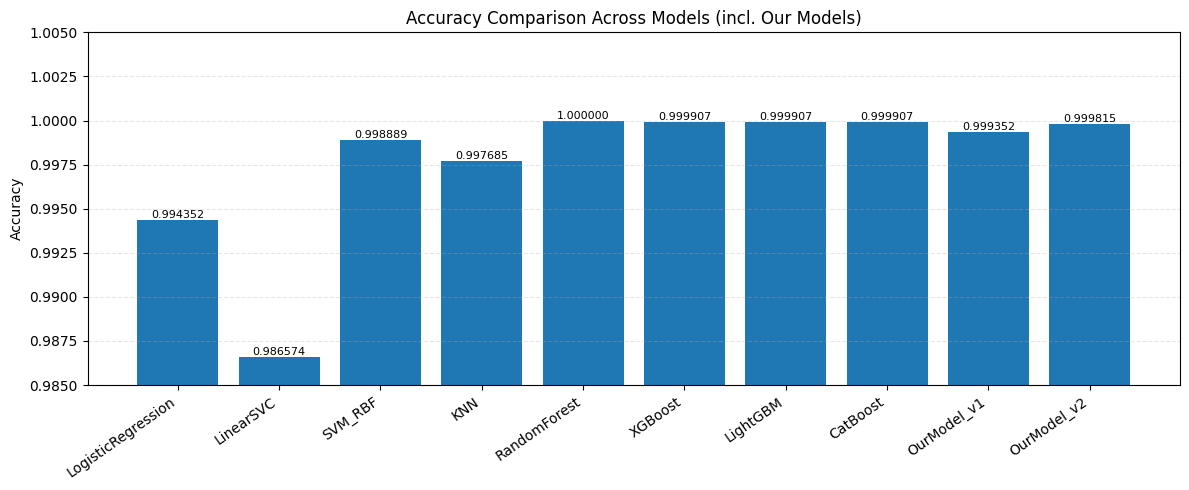

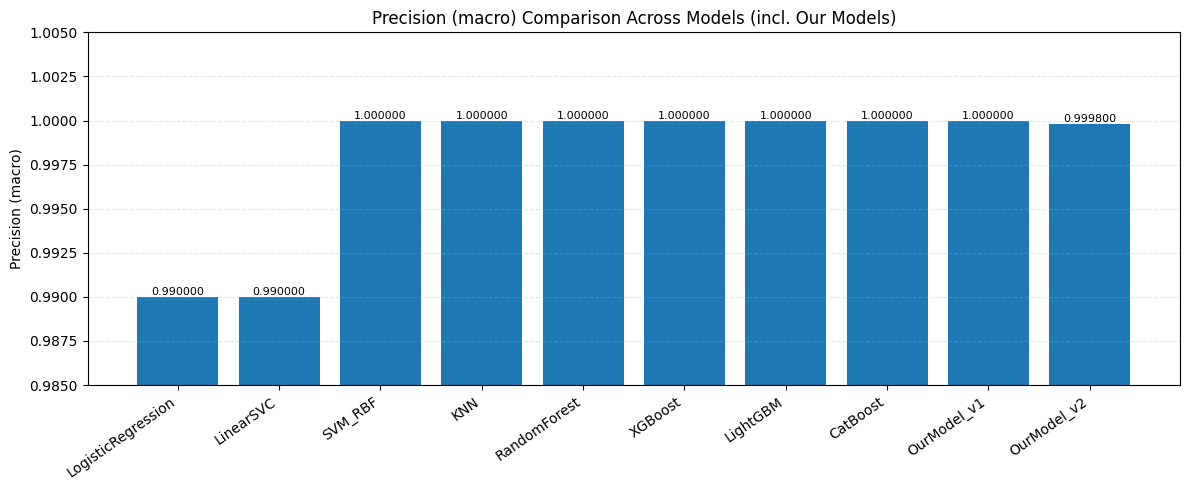

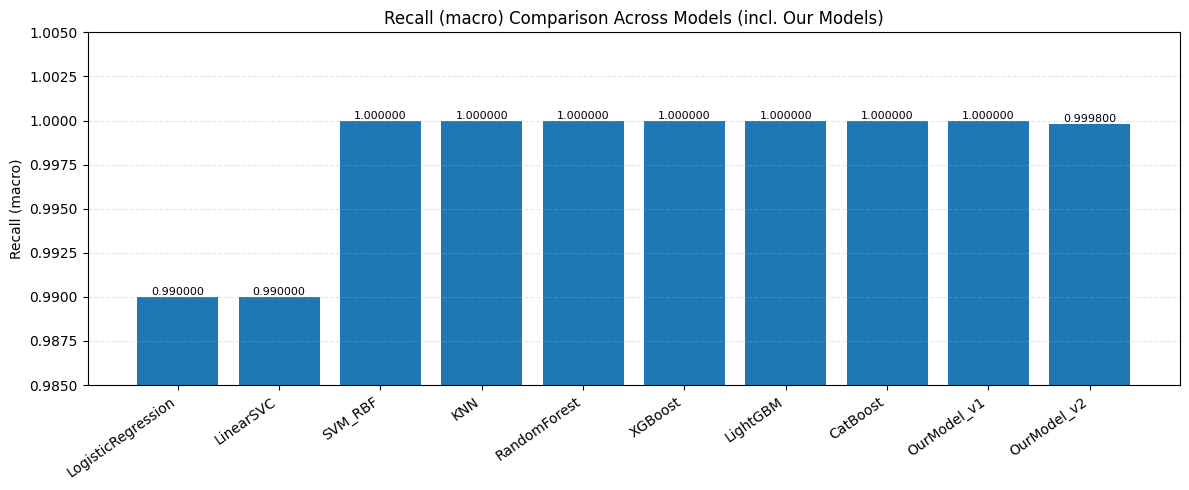

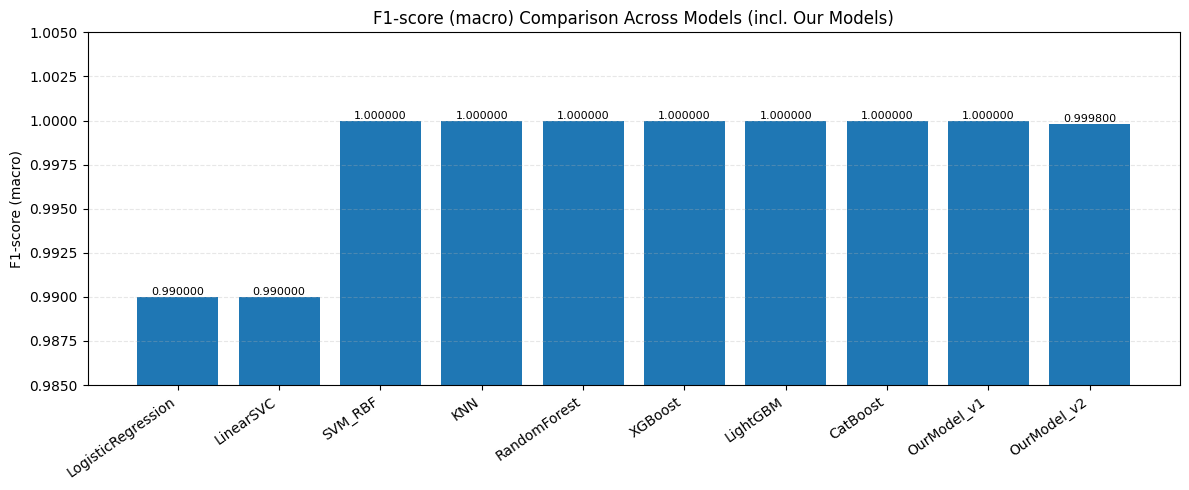

In [ ]:
import matplotlib.pyplot as plt

models = [
    "LogisticRegression",
    "LinearSVC",
    "SVM_RBF",
    "KNN",
    "RandomForest",
    "XGBoost",
    "LightGBM",
    "CatBoost",
    "OurModel_v1",
    "OurModel_v2"
]

accuracy = [
    0.9943518518518518,
    0.986574074074074,
    0.9988888888888889,
    0.9976851851851852,
    1.0,
    0.9999074074074074,
    0.9999074074074074,
    0.9999074074074074,
    0.9993518518518518,
    0.999814814815
]

precision = [
    0.99,
    0.99,
    1.00,
    1.00,
    1.00,
    1.00,
    1.00,
    1.00,
    1.00,
    0.9998
]

recall = precision[:]
f1 = precision[:]

metrics = {
    "Accuracy": accuracy,
    "Precision (macro)": precision,
    "Recall (macro)": recall,
    "F1-score (macro)": f1
}

# ===========================
# PLOT
# ===========================

for metric_name, values in metrics.items():
    plt.figure(figsize=(12, 5))
    bars = plt.bar(models, values)
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, value, f"{value:.6f}",
                 ha='center', va='bottom', fontsize=8, rotation=0)
    plt.title(f"{metric_name} Comparison Across Models (incl. Our Models)")
    plt.ylabel(metric_name)
    plt.xticks(rotation=35, ha='right')
    plt.ylim(0.985, 1.005)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [22]:
import matplotlib.pyplot as plt

# Data
epochs = [100, 1000, 2000, 4000, 6000, 8000, 10000]
# Original accuracy value
constant_accuracy = 0.999814814815
# Create a list of accuracy values, repeating the constant_accuracy for each epoch
accuracy = [constant_accuracy] * len(epochs)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o')
plt.title("SE+Wide Layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs, rotation=30)
plt.tight_layout()

# Save
output_path = "epoch_vs_accuracy.png"
plt.savefig(output_path)
plt.close()

output_path

'epoch_vs_accuracy.png'